In [1]:
import os
os.getcwd()

'e:\\Data_Analysis\\Data_Analytics_Projects\\Placement-Insights-Unveiling-Trends-in-Student-Career-Trajectories\\Placement-Insights-Unveiling-Trends-in-Student-Career-Trajectories\\Notebook'

In [2]:
#importing all the requirement libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [3]:
#import datasets
df1=pd.read_csv('../Datasets/Placement_Data_Full_Class.csv')

In [4]:
df1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
#cheking for null values on Sri Lanka dataset
df1.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
#Get the number of rows in the DataFrame
num_rows = df1.shape[0]

print("Number of rows in the dataset:", num_rows)

Number of rows in the dataset: 215


In [9]:
#find duplicate rows count on USA dataset 
df1.duplicated().value_counts()

False    215
Name: count, dtype: int64

In [10]:
df1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [21]:

# Assuming df1 is your DataFrame

# Get the distinct values in the specified columns
no_of_values_1 = df1['hsc_s'].unique()
no_of_values_2 = df1['degree_t'].unique()
no_of_values_3 = df1['specialisation'].unique()
no_of_values_4 = df1['status'].unique()

# Output the distinct values for each column
print("Distinct values in 'hsc_s' column:", no_of_values_1)
print("Distinct values in 'degree_t' column:", no_of_values_2)
print("Distinct values in 'specialisation' column:", no_of_values_3)
print("Distinct values in 'status' column:", no_of_values_4)





Distinct values in 'hsc_s' column: ['Commerce' 'Science' 'Arts']
Distinct values in 'degree_t' column: ['Sci&Tech' 'Comm&Mgmt' 'Others']
Distinct values in 'specialisation' column: ['Mkt&HR' 'Mkt&Fin']
Distinct values in 'status' column: ['Placed' 'Not Placed']


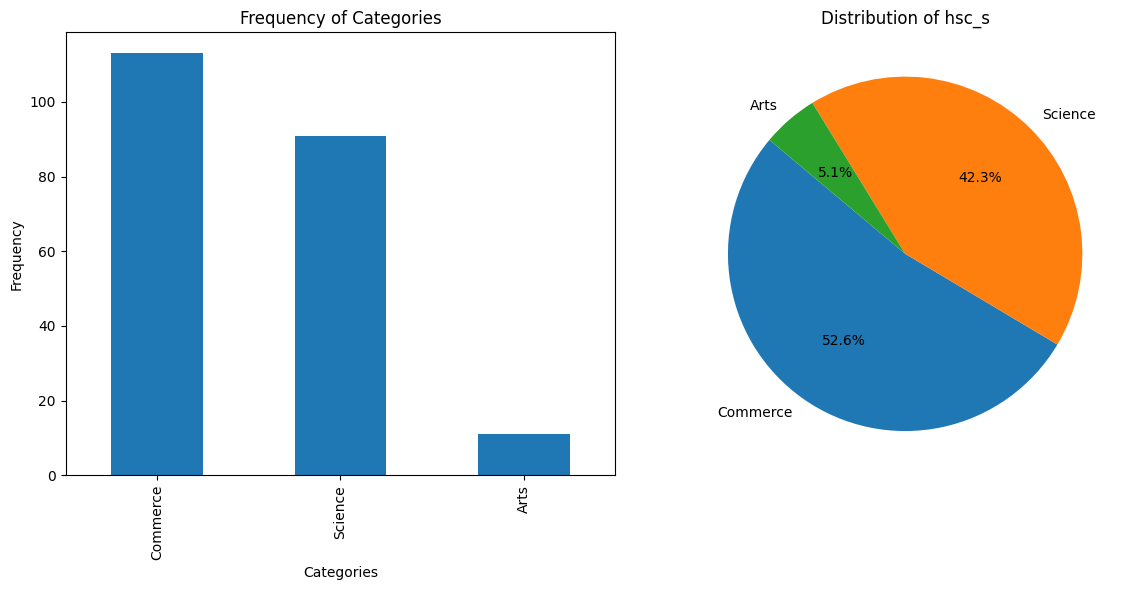

In [25]:
# Calculate the frequency of each value in the 'hsc_s' column
category_counts = df1['hsc_s'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the frequency bar chart
category_counts.plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Categories')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Frequency of Categories')

# Calculate the frequency of each value in the 'hsc_s' column for the pie chart
hsc_s_counts = df1['hsc_s'].value_counts()

# Plotting the pie chart for 'hsc_s' column
axs[1].pie(hsc_s_counts, labels=hsc_s_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of hsc_s')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


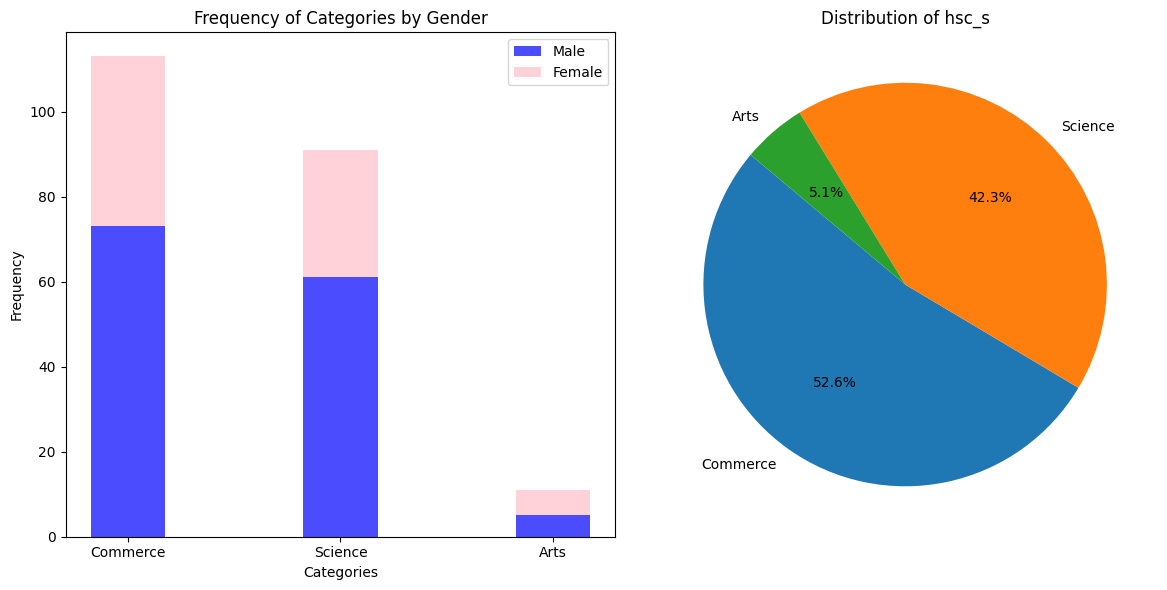

In [39]:

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Calculate the frequency of each value in the 'hsc_s' column for both genders
hsc_s_counts_male = df1[df1['gender'] == 'M']['hsc_s'].value_counts()
hsc_s_counts_female = df1[df1['gender'] == 'F']['hsc_s'].value_counts()

# Plotting the frequency bar chart
bar_width = 0.35  # width of the bars
categories = hsc_s_counts_male.index

axs[0].bar(categories, hsc_s_counts_male, bar_width, label='Male', color='blue', alpha=0.7)
axs[0].bar(categories, hsc_s_counts_female, bar_width, bottom=hsc_s_counts_male, label='Female', color='pink', alpha=0.7)

axs[0].set_xlabel('Categories')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Frequency of Categories by Gender')
axs[0].legend()

# Plotting the pie chart for 'hsc_s' column
axs[1].pie(hsc_s_counts, labels=hsc_s_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of hsc_s')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


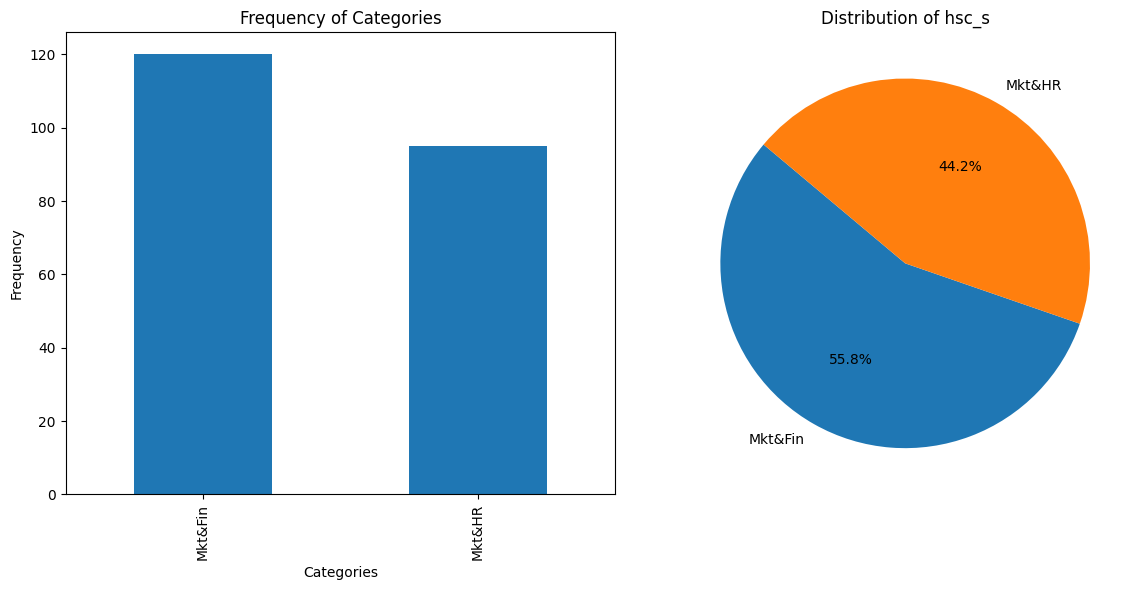

In [27]:

category_counts = df1['specialisation'].value_counts()


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

category_counts.plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Categories')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Frequency of Categories')


hsc_s_counts = df1['specialisation'].value_counts()


axs[1].pie(hsc_s_counts, labels=hsc_s_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of hsc_s')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



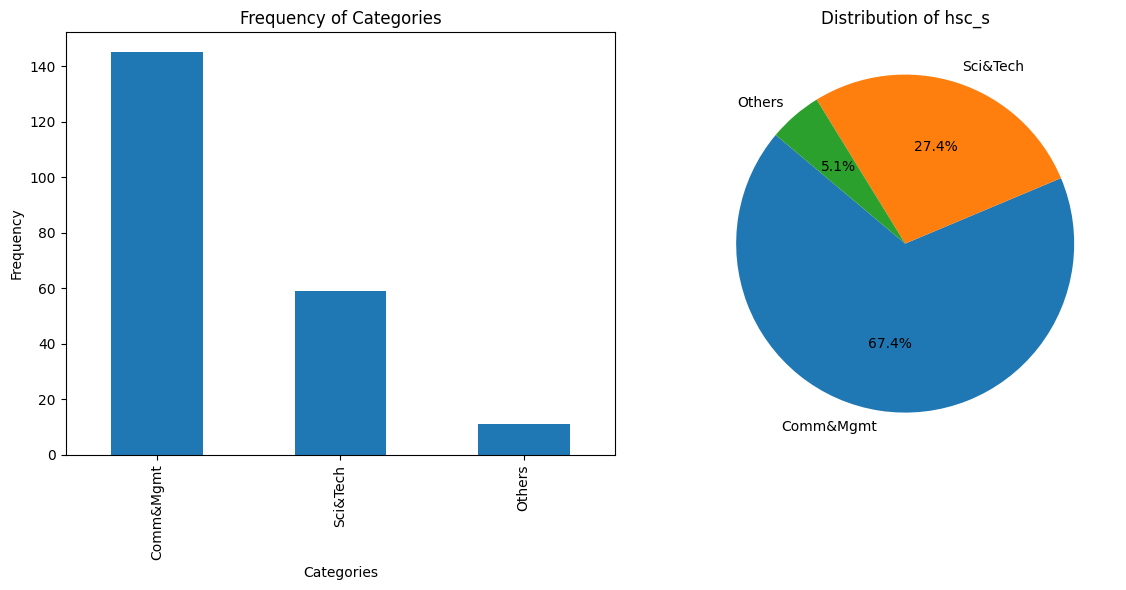

In [30]:

category_counts = df1['degree_t'].value_counts()


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

category_counts.plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Categories')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Frequency of Categories')


hsc_s_counts = df1['degree_t'].value_counts()


axs[1].pie(hsc_s_counts, labels=hsc_s_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of hsc_s')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



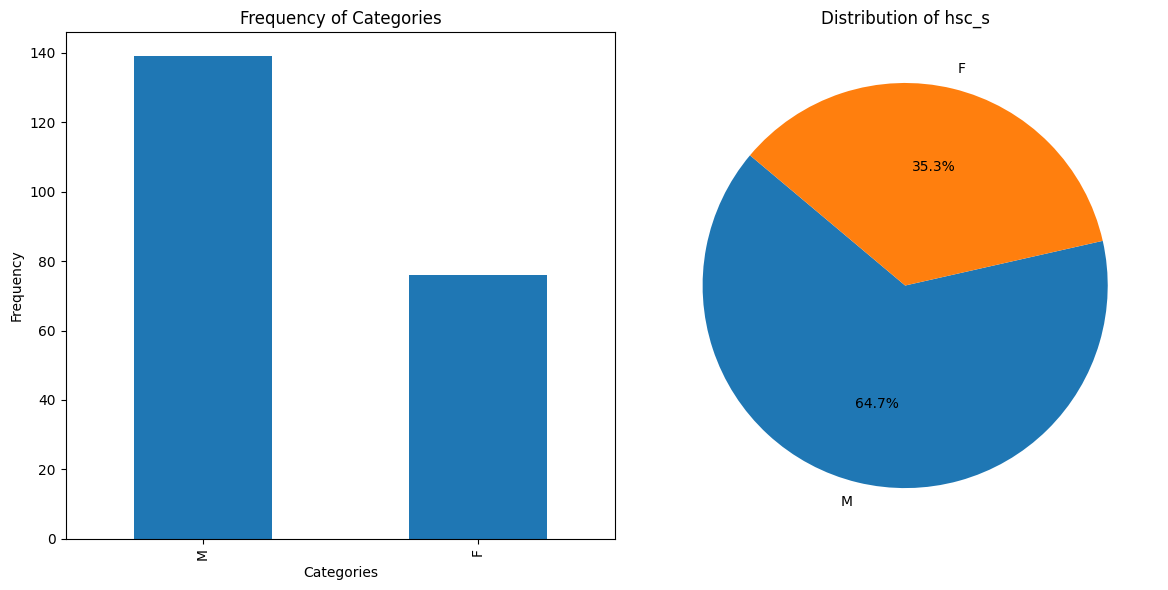

In [34]:

category_counts = df1['gender'].value_counts()


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

category_counts.plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Categories')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Frequency of Categories')


hsc_s_counts = df1['gender'].value_counts()


axs[1].pie(hsc_s_counts, labels=hsc_s_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of hsc_s')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



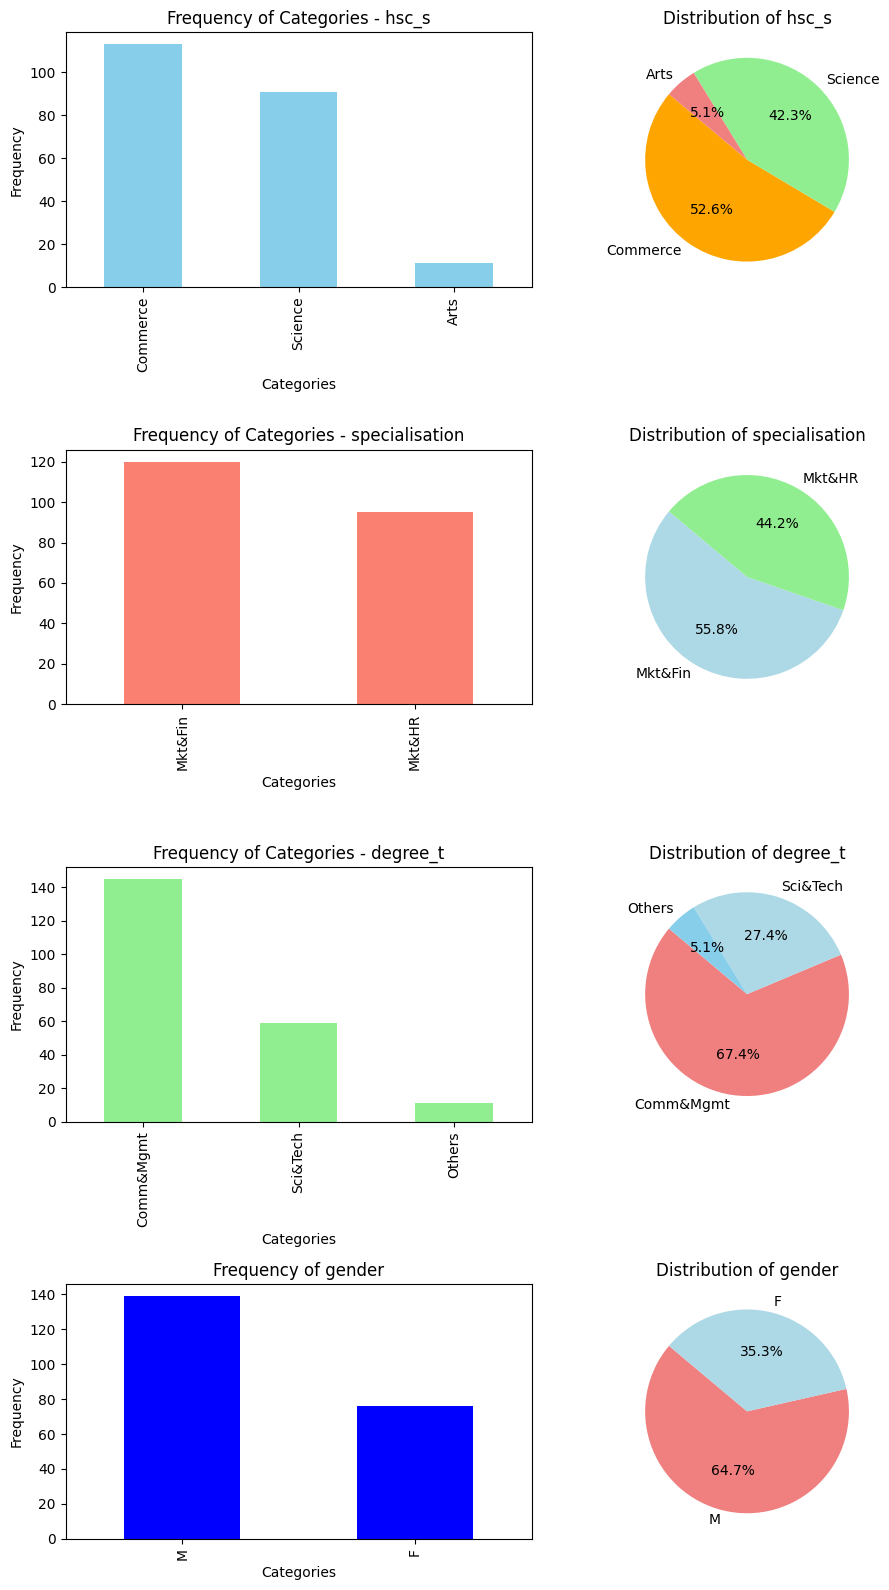

In [36]:


# Create a smaller figure with four subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 16))

# Plotting the frequency bar chart and pie chart for 'hsc_s' column
category_counts_hsc_s = df1['hsc_s'].value_counts()
category_counts_hsc_s.plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_xlabel('Categories')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Frequency of Categories - hsc_s')

hsc_s_counts = df1['hsc_s'].value_counts()
axs[0, 1].pie(hsc_s_counts, labels=hsc_s_counts.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'lightgreen', 'lightcoral'])
axs[0, 1].set_title('Distribution of hsc_s')

# Plotting the frequency bar chart and pie chart for 'specialisation' column
category_counts_specialisation = df1['specialisation'].value_counts()
category_counts_specialisation.plot(kind='bar', ax=axs[1, 0], color='salmon')
axs[1, 0].set_xlabel('Categories')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Frequency of Categories - specialisation')

specialisation_counts = df1['specialisation'].value_counts()
axs[1, 1].pie(specialisation_counts, labels=specialisation_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
axs[1, 1].set_title('Distribution of specialisation')

# Plotting the frequency bar chart and pie chart for 'degree_t' column
category_counts_degree_t = df1['degree_t'].value_counts()
category_counts_degree_t.plot(kind='bar', ax=axs[2, 0], color='lightgreen')
axs[2, 0].set_xlabel('Categories')
axs[2, 0].set_ylabel('Frequency')
axs[2, 0].set_title('Frequency of Categories - degree_t')

degree_t_counts = df1['degree_t'].value_counts()
axs[2, 1].pie(degree_t_counts, labels=degree_t_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue', 'skyblue'])
axs[2, 1].set_title('Distribution of degree_t')

# Plotting the frequency bar chart and pie chart for 'gender' column
category_counts_gender = df1['gender'].value_counts()
category_counts_gender.plot(kind='bar', ax=axs[3, 0], color='blue')
axs[3, 0].set_xlabel('Categories')
axs[3, 0].set_ylabel('Frequency')
axs[3, 0].set_title('Frequency of gender')

gender_counts = df1['gender'].value_counts()
axs[3, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue', 'skyblue'])
axs[3, 1].set_title('Distribution of gender')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


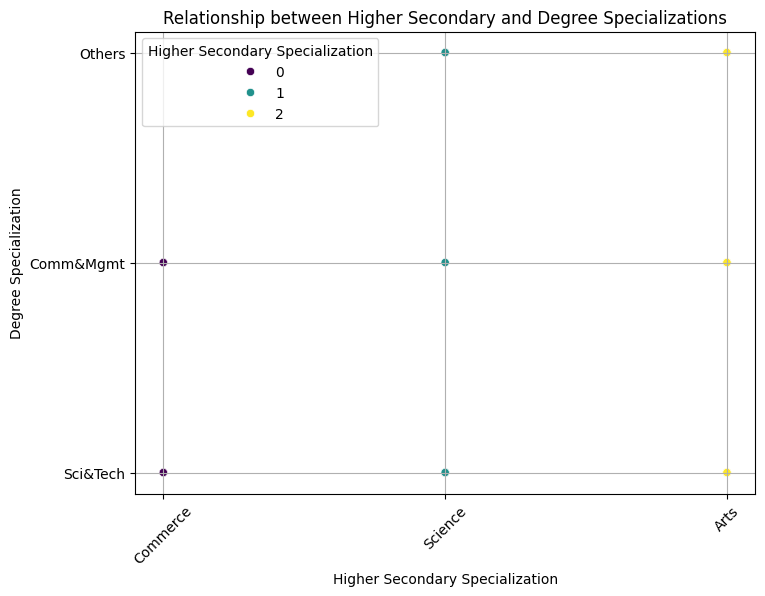